In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/yjzhu/SOLAR/MyPy")
import juanfit
from juanfit import gaussian


In [2]:
def custom_func(wvl,int1,int2,int3,wvl1,wvl2,wvl3,fwhm1,fwhm2,int_cont):
    return gaussian(wvl,wvl1,int1,fwhm1) + gaussian(wvl,wvl2,int2,fwhm2) + \
        gaussian(wvl,wvl3,int3,fwhm1) + int_cont

In [3]:
wvl = np.linspace(194,196,101)
data = gaussian(wvl,195.05,2,0.08) + gaussian(wvl,194.72,1,0.07) + \
        gaussian(wvl,195.15,0.3,0.08) + 1

error_lvl = np.sqrt(data + 0.01)*0.1
data += np.random.normal(loc=0,scale=error_lvl)

<AxesSubplot:ylabel='Intensity'>

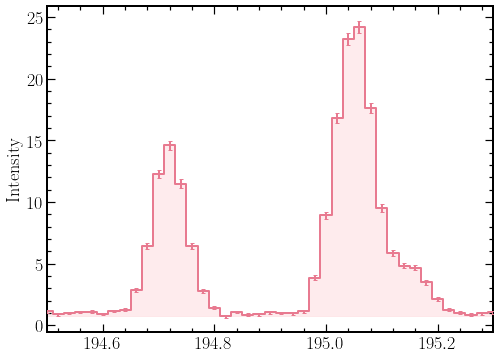

In [4]:
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle
fit_model = SpectrumFitSingle(data=data,wvl=wvl,err=error_lvl,line_number=3,same_width=[False,True,True],
                            line_wvl_init=[194.7,195,195.1],int_max_init=[10,15,5],
                            fwhm_init=[0.1,0.15,0.1])
#fit_model.plot(plot_fit=False,xlim=(194.5,195.3))
#fit_model.run_lse()
#fit_model.run_HahnMC(n_chain=1000)
fit_model.plot(xlim=(194.5,195.3),plot_fit=False)

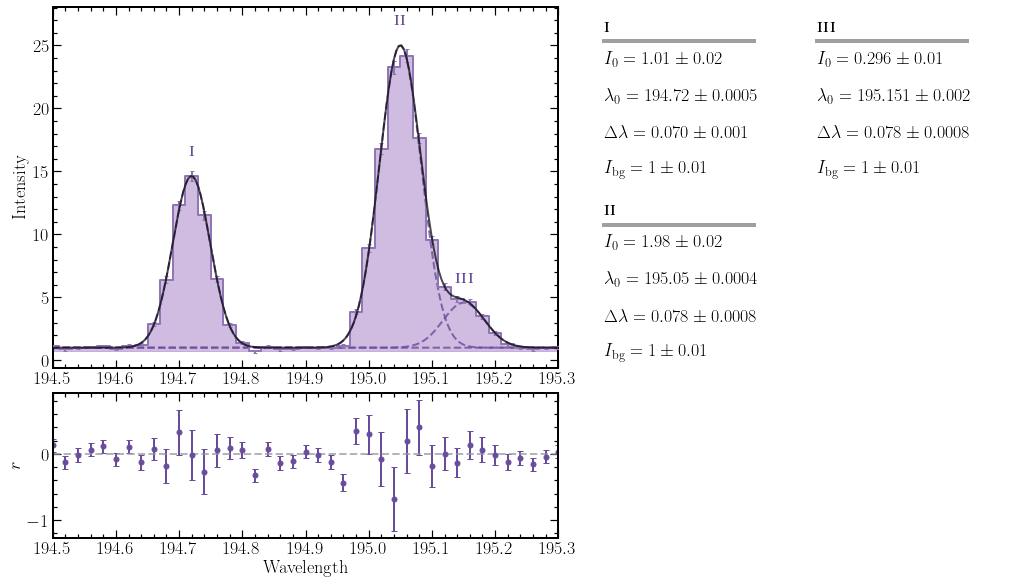

In [9]:
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle
from juanfit import gaussian
fit_model = SpectrumFitSingle(data=data,wvl=wvl,err=error_lvl,line_number=3,same_width=[False,True,True],
                            line_wvl_init=[194.7,195,195.1],int_max_init=[10,15,5],
                            fwhm_init=[0.1,0.15,0.1])
#fit_model.plot(plot_fit=False,xlim=(194.5,195.3))
fit_model.run_lse()
#fit_model.run_HahnMC(n_chain=1000)
ax = fit_model.plot(xlim=(194.5,195.3),plot_fit=True,
                color_style="Purple")
#fit_model.fwhm_fit

/home/yjzhu/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


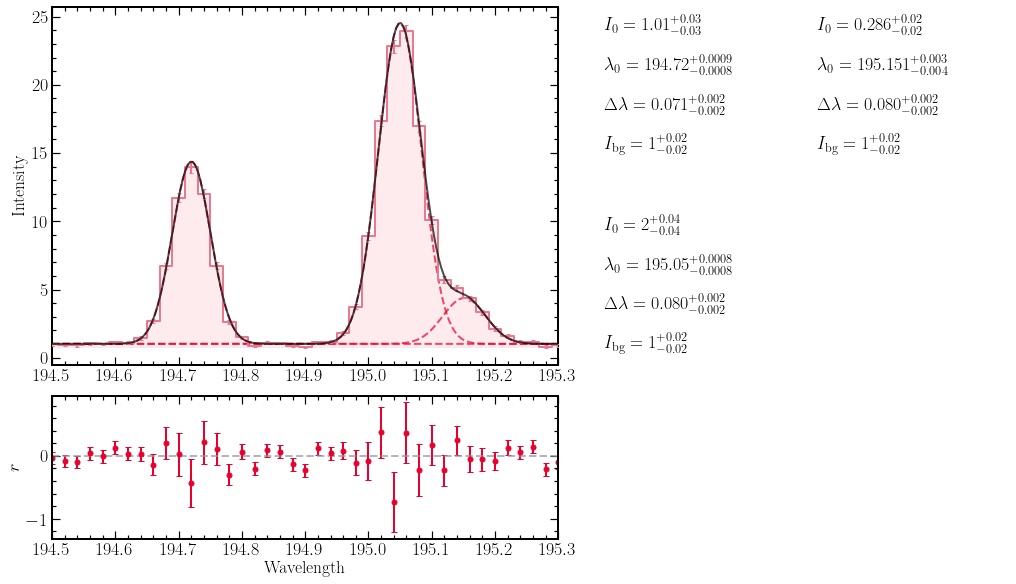

In [13]:
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle
from juanfit import gaussian
fit_model = SpectrumFitSingle(data=data,wvl=wvl,err=error_lvl,line_number=3,same_width=[False,True,True],
                            line_wvl_init=[194.7,195,195.1],int_max_init=[10,15,5],
                            fwhm_init=[0.1,0.15,0.1])
#fit_model.plot(plot_fit=False,xlim=(194.5,195.3))
#fit_model.run_lse()
fit_model.run_HahnMC(n_chain=1000)
fit_model.plot(xlim=(194.5,195.3),plot_hmc=True,plot_params=True,save_fig=True,save_fname="/home/yjzhu/SOLAR/fit_result.pdf")
#fit_model.fwhm_fit

In [85]:
np.concatenate((fit_model.line_wvl_fit,fit_model.int_total_fit,0.07713983,0.1,fit_model.int_cont_fit),axis=None)

array([1.94720441e+02, 1.95050657e+02, 1.95145753e+02, 1.01543795e+00,
       2.01197596e+00, 2.88750819e-01, 7.71398300e-02, 1.00000000e-01,
       9.76877163e-01])

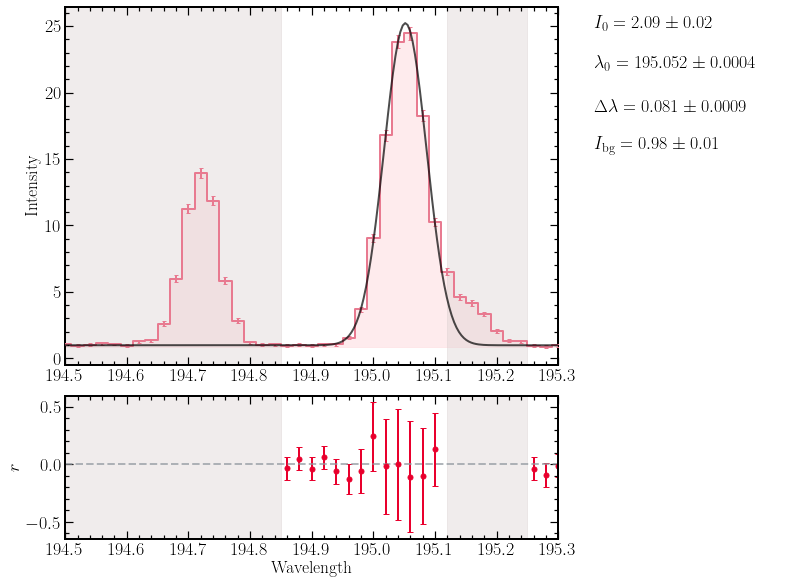

In [183]:
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle
from juanfit import gaussian
fit_model = SpectrumFitSingle(data=data,wvl=wvl,err=error_lvl,line_number=1,
                            line_wvl_init=[195],int_max_init=[15],
                            fwhm_init=[0.1],mask=[[195.12,195.25],[194.5,194.85]])
#fit_model.plot(plot_fit=False,xlim=(194.5,195.3))
fit_model.run_lse()
#fit_model.run_HahnMC(n_chain=1000)
#fit_model.plot(xlim=(194.5,195.3),color_style="Cold")
fit_model.plot(xlim=(194.5,195.3),save_fig=True,save_fname="/home/yjzhu/SOLAR/fit_result_2.pdf")
#fit_model.wvl_tofit

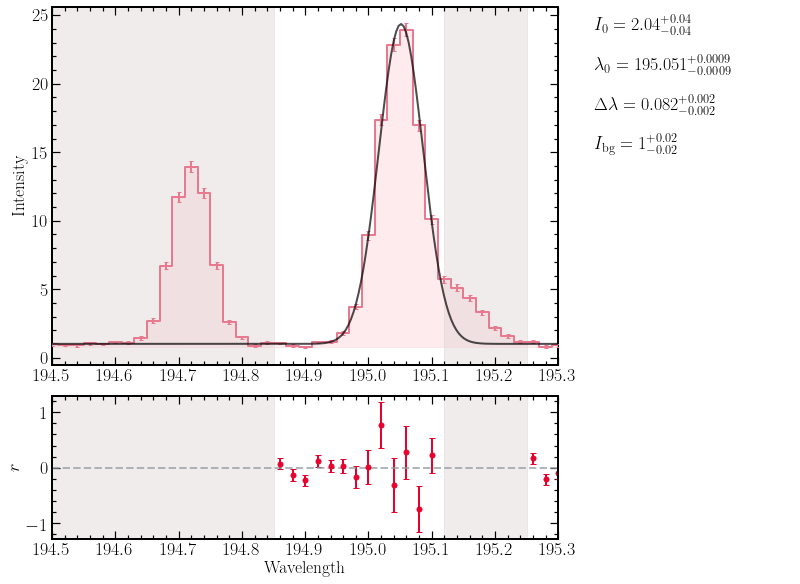

In [15]:
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle
from juanfit import gaussian
fit_model = SpectrumFitSingle(data=data,wvl=wvl,err=error_lvl,line_number=1,
                            line_wvl_init=[195],int_max_init=[15],
                            fwhm_init=[0.1],mask=[[195.12,195.25],[194.5,194.85]])
#fit_model.plot(plot_fit=False,xlim=(194.5,195.3))
#fit_model.run_lse()
fit_model.run_HahnMC(n_chain=1000)
fit_model.plot(xlim=(194.5,195.3),color_style="Red",plot_hmc=True)
#fit_model.wvl_tofit

[1.00851731e+00 2.01640190e+00 2.59901802e-01 1.94720054e+02
 1.95050392e+02 1.95154629e+02 7.11725094e-02 8.10036909e-02
 1.01234812e+00]


/home/yjzhu/SOLAR/MyPy/juanfit.py:449: UserWarning: Use custom function in the fitting. Will not plot fitted parameters.
  warn("Use custom function in the fitting. Will not plot fitted parameters.")


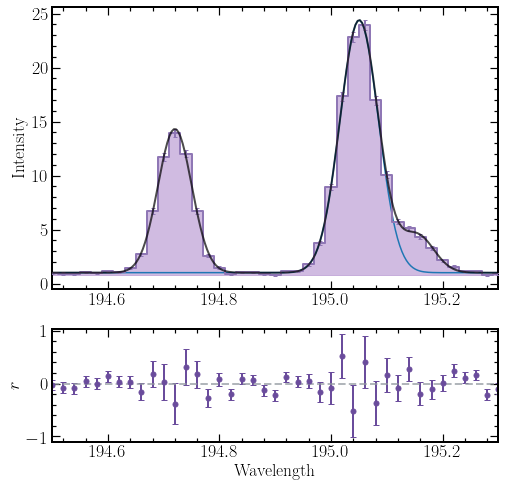

In [45]:
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle
from juanfit import gaussian
fit_model = SpectrumFitSingle(data=data,wvl=wvl,err=error_lvl,custom_func=custom_func,
custom_init=[10,25,5,194.7,195,195.1,0.07,0.07,0.3])
#fit_model.plot(plot_fit=False,xlim=(194.5,195.3))
fit_model.run_lse()
#fit_model.run_HahnMC(n_chain=1000)
ax = fit_model.plot(xlim=(194.5,195.3),plot_fit=True,color_style="Purple")
print(fit_model.custom_fit)
ax.plot(fit_model.wvl_plot,gaussian(fit_model.wvl_plot,
                     fit_model.custom_fit[4],fit_model.custom_fit[1],fit_model.custom_fit[7])+fit_model.custom_fit[-1])
#ax.plot(fit_model.wvl_plot,custom_func(fit_model.wvl_plot,*fit_model.custom_fit)+5)